# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Load Data

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [7]:
data.describe(include='object').T

,count,unique,top,freq
gender,100000,3,Female,58552
smoking_history,100000,6,No Info,35816


In [8]:
data.duplicated().sum()

3854

distribution of the target

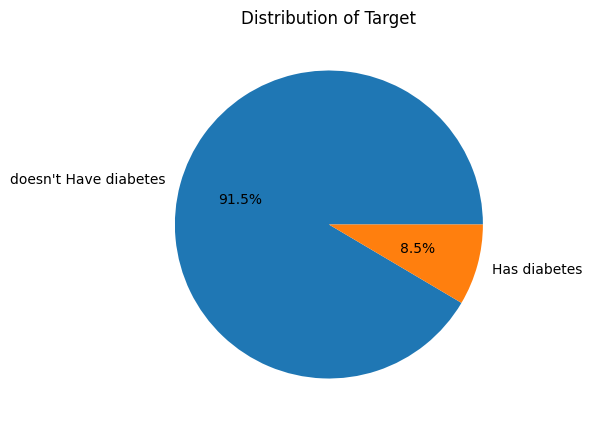

In [9]:
plt.figure(figsize=(10, 5))
plt.pie(data['diabetes'].value_counts(),
        labels=data['diabetes'].replace({0: "doesn't Have diabetes", 1: 'Has diabetes'}).value_counts().index,
        autopct='%1.1f%%')
plt.title('Distribution of Target')
plt.show()

The data is imbalanced

gender and diabetes

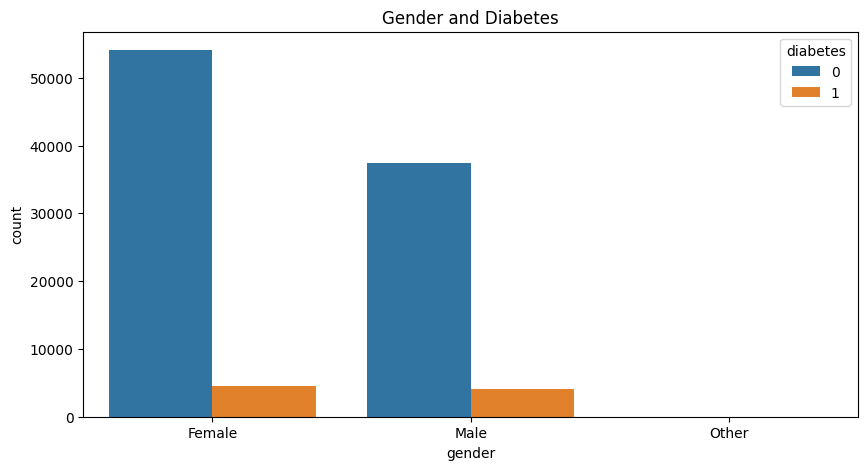

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='gender', hue='diabetes')
plt.title('Gender and Diabetes')
plt.show()

smoking_history and diabetes

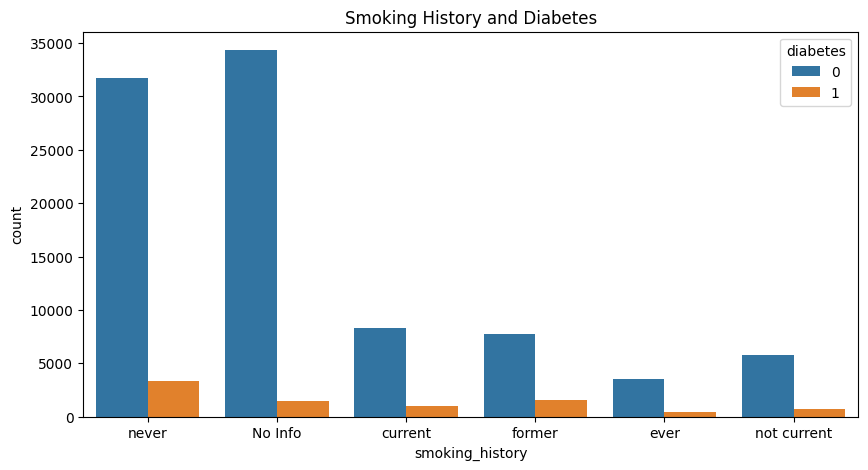

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='smoking_history', hue='diabetes')
plt.title('Smoking History and Diabetes')
plt.show()

age and diabetes

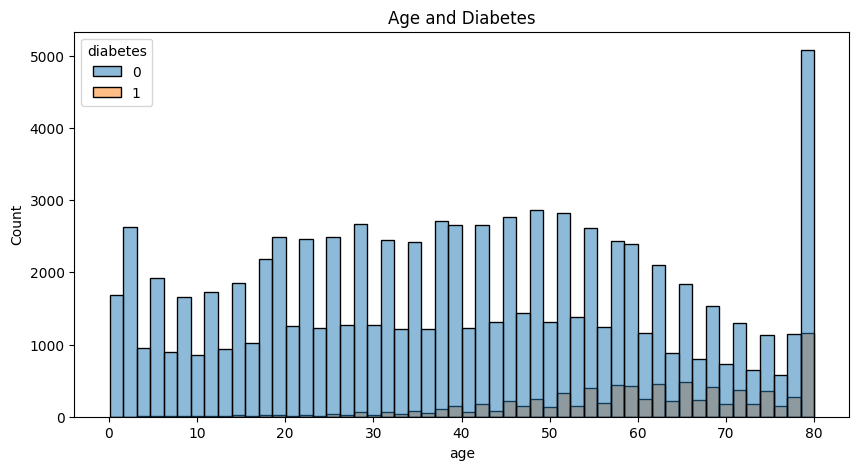

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='age', hue='diabetes')
plt.title('Age and Diabetes')
plt.show()

bmi and diabetes

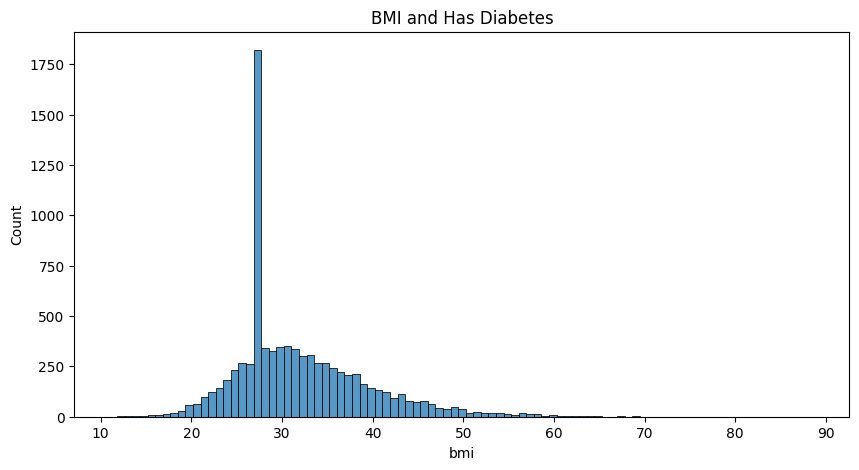

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['diabetes']==1], x='bmi')
plt.title('BMI and Has Diabetes')
plt.show()

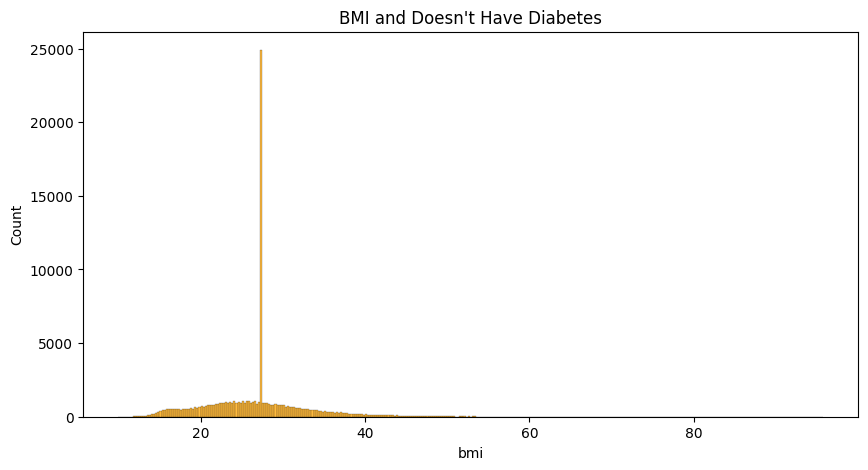

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['diabetes']==0], x='bmi', color='orange')
plt.title('BMI and Doesn\'t Have Diabetes')
plt.show()

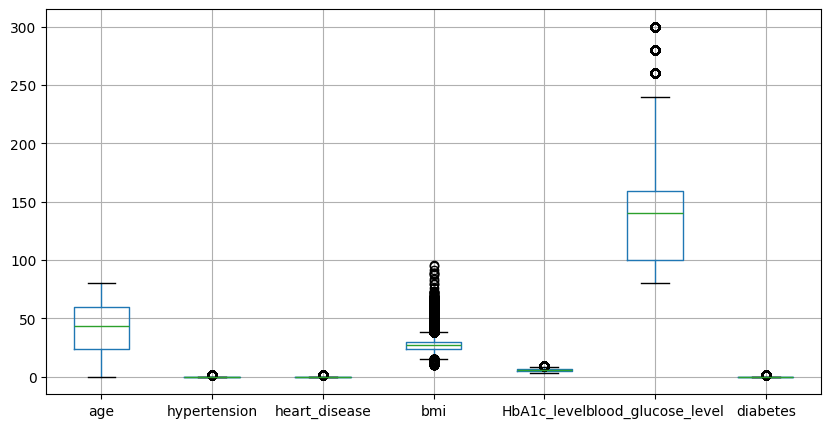

In [15]:
plt.figure(figsize=(10, 5))
data.boxplot()
plt.show()

# Data Preprocessing

drop dublicates

In [16]:
data.drop_duplicates(inplace=True)

## Categorical Encoding

In [17]:
data.select_dtypes(include='object').columns

Index(['gender', 'smoking_history'], dtype='object')

In [18]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].map({'never': 0, 'No Info': 1, 'not current': 2, 'former': 3, 'ever': 4, 'current': 5})

## Data Splitting

In [19]:
x = data.drop('diabetes', axis=1)
y = data['diabetes']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

## Data Scaling

In [21]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [22]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.5,0.562062,0.0,0.0,0.2,0.162657,0.400000,0.209091
1,0.0,0.799800,0.0,0.0,0.6,0.270156,0.090909,0.209091
2,0.0,0.562062,0.0,0.0,0.2,0.203145,0.563636,0.209091
3,0.5,0.549550,1.0,0.0,0.2,0.221218,0.236364,0.000000
4,0.0,0.336837,0.0,0.0,0.4,0.193287,0.545455,0.545455


# Modeling

## Logistic Regression

In [23]:
LR = LogisticRegression(penalty='l2', random_state=42)
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

0.958656196370066
0.9555136677863453
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     70130
           1       0.87      0.62      0.73      6786

    accuracy                           0.96     76916
   macro avg       0.92      0.81      0.85     76916
weighted avg       0.96      0.96      0.96     76916



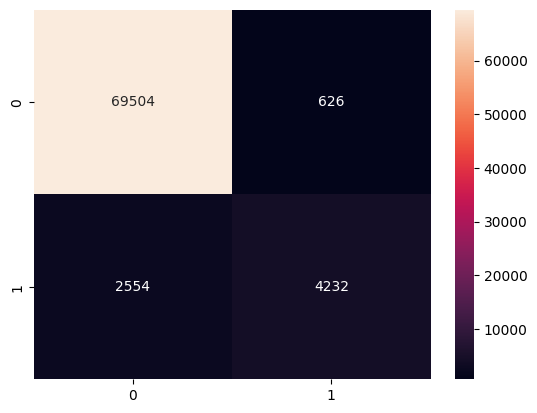

0.9588663546541861
0.9557768732979783
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17534
           1       0.87      0.63      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



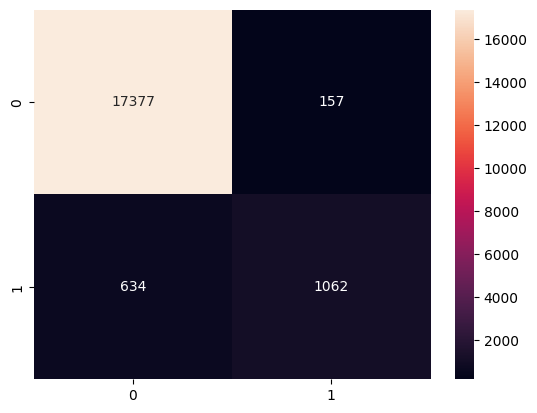

In [25]:
print(accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train, average='weighted'))
print(classification_report(y_train, y_pred_train))
cm_train_pred = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train_pred, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))
cm_test_pred = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test_pred, annot=True, fmt='d')
plt.show()

## Decision Tree Classifier

In [26]:
DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

0.9705522908107546
0.9678368227533684
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70130
           1       1.00      0.67      0.80      6786

    accuracy                           0.97     76916
   macro avg       0.98      0.83      0.89     76916
weighted avg       0.97      0.97      0.97     76916



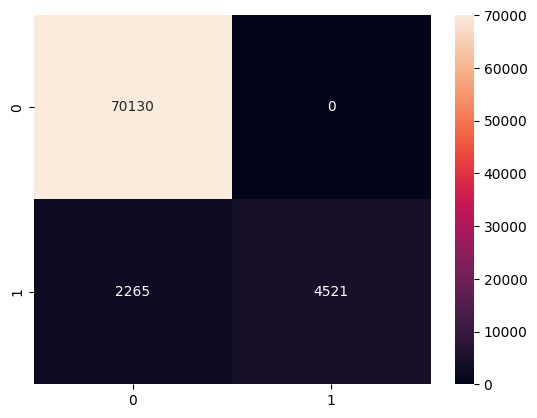

0.971606864274571
0.969100926456071
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       1.00      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



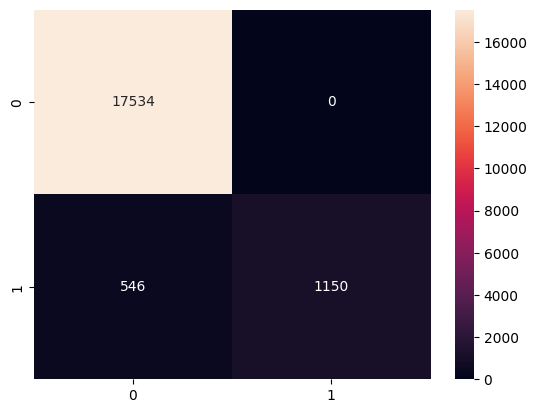

In [28]:
print(accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train, average='weighted'))
print(classification_report(y_train, y_pred_train))
cm_train_pred = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train_pred, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))
cm_test_pred = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test_pred, annot=True, fmt='d')
plt.show()

## KNN

In [29]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [30]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

0.964181704716834
0.9604942090053286
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     70130
           1       0.97      0.61      0.75      6786

    accuracy                           0.96     76916
   macro avg       0.97      0.81      0.87     76916
weighted avg       0.96      0.96      0.96     76916



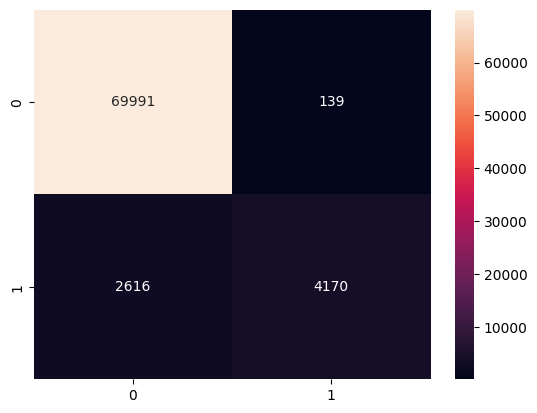

0.9613624544981799
0.95730492153864
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17534
           1       0.95      0.60      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.95      0.80      0.86     19230
weighted avg       0.96      0.96      0.96     19230



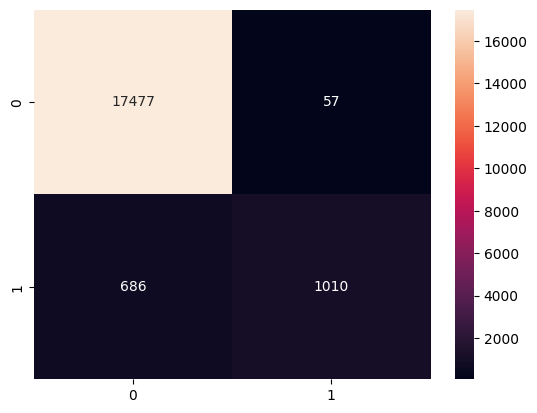

In [31]:
print(accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train, average='weighted'))
print(classification_report(y_train, y_pred_train))
cm_train_pred = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train_pred, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))
cm_test_pred = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test_pred, annot=True, fmt='d')
plt.show()

##  Random Forest Classifier

In [32]:
RF = RandomForestClassifier(n_estimators=250, max_depth=5, random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=250, random_state=42)

In [33]:
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

0.9705522908107546
0.9678368227533684
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70130
           1       1.00      0.67      0.80      6786

    accuracy                           0.97     76916
   macro avg       0.98      0.83      0.89     76916
weighted avg       0.97      0.97      0.97     76916



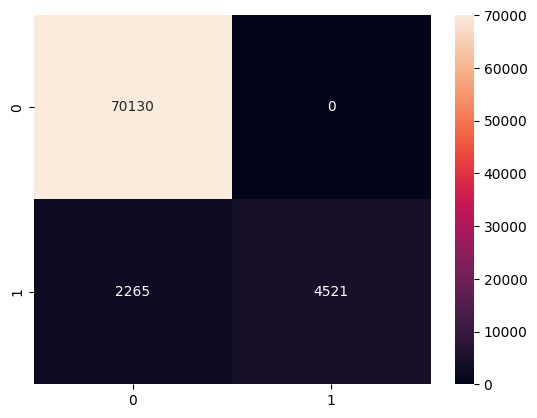

0.971606864274571
0.969100926456071
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       1.00      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



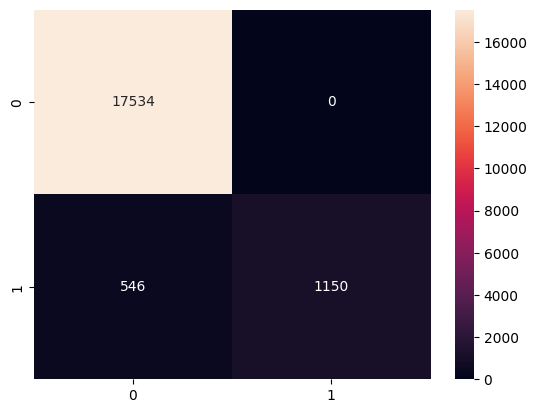

In [34]:
print(accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train, average='weighted'))
print(classification_report(y_train, y_pred_train))
cm_train_pred = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train_pred, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))
cm_test_pred = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test_pred, annot=True, fmt='d')
plt.show()

## Adaboosting Classifier

In [35]:
ada = AdaBoostClassifier(n_estimators=250, random_state=42, algorithm='SAMME')
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=250, random_state=42)

In [36]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

0.9706042955951948
0.9680237999828953
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70130
           1       0.99      0.67      0.80      6786

    accuracy                           0.97     76916
   macro avg       0.98      0.84      0.89     76916
weighted avg       0.97      0.97      0.97     76916



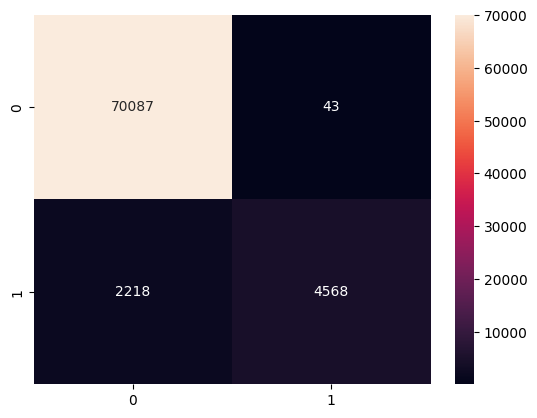

0.9715028601144046
0.9690763755551003
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.99      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



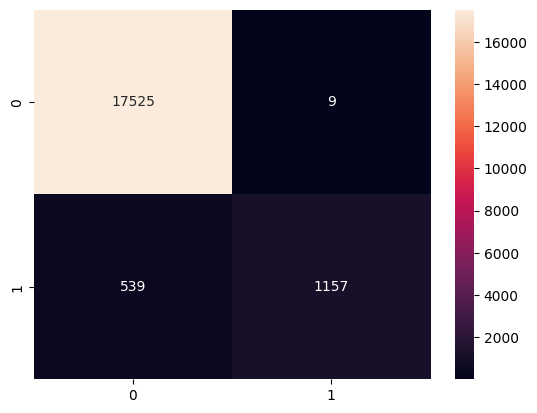

In [37]:
print(accuracy_score(y_train, y_pred_train))
print(f1_score(y_train, y_pred_train, average='weighted'))
print(classification_report(y_train, y_pred_train))
cm_train_pred = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train_pred, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))
cm_test_pred = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test_pred, annot=True, fmt='d')
plt.show()